In [ ]:
from google.colab import drive #using google drive for storage
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import seaborn as sns #all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#converting the file tsv -? csv
# tsv_file= r'C:\Users\mistr\OneDrive\Documents\SJSU studies\DATA 245\project\train.tsv'
# csv_table=pd.read_table(tsv_file,sep='\t')
# csv_table.to_csv('train_ebay.csv',index=False)

In [ ]:
#pandas dataframe train and test from google drive 
dataset_test = pd.read_csv("gdrive/My Drive/quiz.csv")
dataset_train = pd.read_csv("gdrive/My Drive/train_ebay.csv")
dataset_train.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


In [ ]:
dataset_train.describe(include="all") #describe of all features in dataset

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
count,15000000,1.500000e+07,1.429711e+07,15000000,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,14999999,14999999,1.500000e+07,1.500000e+07,1.500000e+07,15000000,15000000,1.500000e+07,1.500000e+07,15000000,1.500000e+07
unique,2,NaN,NaN,2245193,NaN,NaN,NaN,NaN,50939,57273,NaN,NaN,NaN,14090416,767,NaN,NaN,7,NaN
top,B2C,NaN,NaN,2019-04-01 00:00:00.000-04:00,NaN,NaN,NaN,NaN,91748,000,NaN,NaN,NaN,2019-02-18 23:48:57.000-06:00,2018-12-10,NaN,NaN,PACKAGE_THICK_ENVELOPE,NaN
freq,10634413,NaN,NaN,2856,NaN,NaN,NaN,NaN,65222,72650,NaN,NaN,NaN,9,54835,NaN,NaN,12652645,NaN
mean,NaN,2.711038e+05,1.620950e+00,NaN,8.818957e-01,2.811783e+00,2.622133e+00,5.462125e+00,NaN,NaN,6.754900e+00,3.613771e+01,1.105763e+00,NaN,NaN,1.608175e+01,1.000002e+00,NaN,7.500000e+06
std,NaN,6.749299e+05,1.498844e+00,NaN,1.657330e+00,5.373618e+00,4.873855e-01,1.229274e+00,NaN,NaN,6.569869e+00,1.099163e+02,1.005447e+00,NaN,NaN,3.254291e+02,1.549192e-03,NaN,4.330127e+06
min,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,-3.000000e+00,-1.000000e+00,-1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,0.000000e+00,1.000000e+00,NaN,1.000000e+00
25%,NaN,5.018000e+03,1.000000e+00,NaN,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,NaN,NaN,1.000000e+00,8.750000e+00,1.000000e+00,NaN,NaN,0.000000e+00,1.000000e+00,NaN,3.750001e+06
50%,NaN,3.743600e+04,1.000000e+00,NaN,0.000000e+00,0.000000e+00,3.000000e+00,5.000000e+00,NaN,NaN,5.000000e+00,1.500000e+01,1.000000e+00,NaN,NaN,4.000000e+00,1.000000e+00,NaN,7.500000e+06
75%,NaN,2.035330e+05,2.000000e+00,NaN,1.000000e+00,4.000000e+00,3.000000e+00,5.000000e+00,NaN,NaN,1.100000e+01,3.025000e+01,1.000000e+00,NaN,NaN,1.600000e+01,1.000000e+00,NaN,1.125000e+07


In [ ]:
#data types of the columns 
dataset_train.dtypes

b2c_c2c                       object
seller_id                      int64
declared_handling_days       float64
acceptance_scan_timestamp     object
shipment_method_id             int64
shipping_fee                 float64
carrier_min_estimate           int64
carrier_max_estimate           int64
item_zip                      object
buyer_zip                     object
category_id                    int64
item_price                   float64
quantity                       int64
payment_datetime              object
delivery_date                 object
weight                         int64
weight_units                   int64
package_size                  object
record_number                  int64
dtype: object

In [ ]:
# number of counts for each value
# dataset_train["b2c_c2c"].value_counts()

In [ ]:
# unqiues values for all object types
for col in dataset_train.select_dtypes(include= "object").columns:
    print ( f'{dataset_train[col]} : {len (dataset_train[col].unique())}')

0           B2C
1           C2C
2           B2C
3           B2C
4           B2C
           ... 
14999995    B2C
14999996    C2C
14999997    B2C
14999998    B2C
14999999    C2C
Name: b2c_c2c, Length: 15000000, dtype: object : 2
0           2019-03-26 15:11:00.000-07:00
1           2018-06-02 12:53:00.000-07:00
2           2019-01-07 16:22:00.000-05:00
3           2018-12-17 16:56:00.000-08:00
4           2018-07-27 16:48:00.000-07:00
                        ...              
14999995    2018-05-04 15:36:00.000-05:00
14999996    2018-05-02 14:53:00.000-04:00
14999997    2018-06-06 15:21:00.000-07:00
14999998    2018-12-17 10:55:00.000-05:00
14999999    2018-05-03 12:56:00.000-04:00
Name: acceptance_scan_timestamp, Length: 15000000, dtype: object : 2245193
0                97219
1           11415-3528
2                27292
3                90703
4                90703
               ...    
14999995         60010
14999996         47909
14999997         91766
14999998         18011
149999

In [ ]:
# missing value for each columns 
# for col, i in enumerate(dataset_train):
#     print( "\033[1m" + f'{dataset_train.columns[col]} has {dataset_train[i].isna().sum()} missing values')

In [ ]:
# heatmap for only numeric values
# corr = dataset_train.corr()

# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

In [ ]:
# dataset_train.corr()

In [ ]:
#chaning delivary_date time to a same timezone
dataset_train['delivery_date'] = pd.to_datetime(dataset_train['delivery_date'], errors = "coerce", utc=True)
dataset_train['payment_datetime'] = pd.to_datetime(dataset_train['payment_datetime'], errors = "coerce", utc=True)
dataset_train['acceptance_scan_timestamp'] = pd.to_datetime(dataset_train['acceptance_scan_timestamp'], errors='coerce', utc=True)


In [ ]:
#dataset_train.dtypes

In [ ]:
#converting columns into numeric values 
dataset_train['actual_delivery_time'] = abs ((dataset_train.loc[:,'payment_datetime'] - dataset_train.loc[:,'delivery_date']).dt.days)
dataset_train['acceptance_scan_timestamp'] = abs ((dataset_train.loc[:,'acceptance_scan_timestamp'] - dataset_train.loc[:,'payment_datetime']).dt.days)

dataset_train["actual_delivery_time"].mean()

4.448688866666667

In [ ]:
# dataset_train["acceptance_scan_timestamp"] = dataset_train["acceptance_scan_timestamp"].dt.day
# dataset_train["payment_datetime"] = dataset_train['payment_datetime'].dt.day


In [ ]:
#converting string numeric into actual numeric values using pandas
dataset_train["item_zip"] = pd.to_numeric (dataset_train["item_zip"] , errors = "coerce")
dataset_train["buyer_zip"] = pd.to_numeric(dataset_train["buyer_zip"], errors = "coerce")

In [ ]:
# label encoder to convert categorical feature into numeric
from sklearn.preprocessing import LabelEncoder
lab_encoder = LabelEncoder()
lab_encoder.fit(dataset_train["package_size"])

dataset_train["package_size"] = pd.DataFrame(lab_encoder.transform(dataset_train["package_size"]))

In [ ]:
# for column b2c_c2c
lab_encoder.fit(dataset_train["b2c_c2c"])
dataset_train["b2c_c2c"] = pd.DataFrame(lab_encoder.transform(dataset_train["b2c_c2c"]))

In [ ]:
dataset_train.head() 

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number,actual_delivery_time
0,0,25454,3.0,2,0,0.0,3,5,97219.0,49040.0,13,27.95,1,2019-03-24 10:56:49+00:00,2019-03-29 00:00:00+00:00,5,1,3,1,5
1,1,6727381,2.0,0,0,3.0,3,5,NaN,62521.0,0,20.50,1,2018-06-01 20:43:54+00:00,2018-06-05 00:00:00+00:00,0,1,5,2,4
2,0,18507,1.0,1,0,4.5,3,5,27292.0,53010.0,1,19.90,1,2019-01-06 05:02:00+00:00,2019-01-10 00:00:00+00:00,9,1,5,3,4
3,0,4677,1.0,1,0,0.0,3,5,90703.0,80022.0,1,35.50,1,2018-12-16 18:28:28+00:00,2018-12-21 00:00:00+00:00,8,1,5,4,5
4,0,4677,1.0,0,0,0.0,3,5,90703.0,55070.0,1,25.00,1,2018-07-27 01:20:02+00:00,2018-07-30 00:00:00+00:00,3,1,5,5,3


In [ ]:
 #correlations after all columns convertedi into numeric form
 corr = dataset_train.corr()

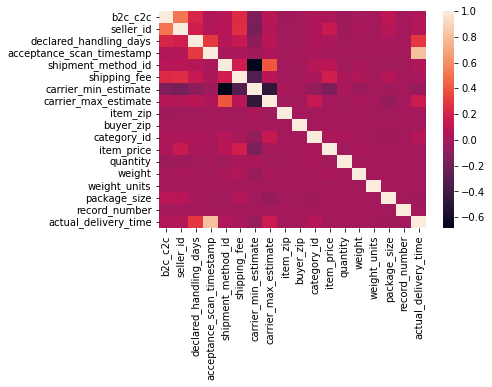

In [ ]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
# checking missing value for each columns 
for col, i in enumerate(dataset_train):
    print( "\033[1m" + f'{dataset_train.columns[col]} has {dataset_train[i].isna().sum()} missing values')

b2c_c2c has 0 missing values
seller_id has 0 missing values
declared_handling_days has 702886 missing values
acceptance_scan_timestamp has 0 missing values
shipment_method_id has 0 missing values
shipping_fee has 0 missing values
carrier_min_estimate has 0 missing values
carrier_max_estimate has 0 missing values
item_zip has 173425 missing values
buyer_zip has 18995 missing values
category_id has 0 missing values
item_price has 0 missing values
quantity has 0 missing values
payment_datetime has 0 missing values
delivery_date has 0 missing values
weight has 0 missing values
weight_units has 0 missing values
package_size has 0 missing values
record_number has 0 missing values
actual_delivery_time has 0 missing values


In [ ]:
#dropping missing values 
dataset_train_updated = dataset_train.dropna()

In [ ]:
# confirm missing values 
for col, i in enumerate(dataset_train_updated):
    print( "\033[1m" + f'{dataset_train_updated.columns[col]} has {dataset_train_updated[i].isna().sum()} missing values')

b2c_c2c has 0 missing values
seller_id has 0 missing values
declared_handling_days has 0 missing values
acceptance_scan_timestamp has 0 missing values
shipment_method_id has 0 missing values
shipping_fee has 0 missing values
carrier_min_estimate has 0 missing values
carrier_max_estimate has 0 missing values
item_zip has 0 missing values
buyer_zip has 0 missing values
category_id has 0 missing values
item_price has 0 missing values
quantity has 0 missing values
payment_datetime has 0 missing values
delivery_date has 0 missing values
weight has 0 missing values
weight_units has 0 missing values
package_size has 0 missing values
record_number has 0 missing values
actual_delivery_time has 0 missing values


In [ ]:
dataset_train_updated.head()

# dataset_train_updated.to_csv('all_numeric_training_data.csv')


,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number,actual_delivery_time
0,0,25454,3.0,2,0,0.0,3,5,97219.0,49040.0,13,27.95,1,2019-03-24 10:56:49+00:00,2019-03-29 00:00:00+00:00,5,1,3,1,5
2,0,18507,1.0,1,0,4.5,3,5,27292.0,53010.0,1,19.90,1,2019-01-06 05:02:00+00:00,2019-01-10 00:00:00+00:00,9,1,5,3,4
3,0,4677,1.0,1,0,0.0,3,5,90703.0,80022.0,1,35.50,1,2018-12-16 18:28:28+00:00,2018-12-21 00:00:00+00:00,8,1,5,4,5
4,0,4677,1.0,0,0,0.0,3,5,90703.0,55070.0,1,25.00,1,2018-07-27 01:20:02+00:00,2018-07-30 00:00:00+00:00,3,1,5,5,3
5,0,10514,1.0,1,0,0.0,3,5,43215.0,77063.0,3,10.39,1,2019-04-18 18:11:09+00:00,2019-04-22 00:00:00+00:00,1,1,5,6,4


In [ ]:
#files.download('all_numeric_training_data.csv')

NameError: ignored

In [ ]:
#describe again without missing values 
dataset_train_updated.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number,actual_delivery_time
count,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,14110792,14110792,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07,1.411079e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12099044,766,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-18 02:59:12+00:00,2018-12-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,50937,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 06:56:48+00:00,2017-11-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-01 06:59:15+00:00,2020-02-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
mean,2.867869e-01,2.670421e+05,1.623549e+00,1.224268e+00,8.706321e-01,2.771644e+00,2.627596e+00,5.451980e+00,1.164695e+06,8.960479e+04,6.731915e+00,3.574542e+01,1.108013e+00,NaN,NaN,1.592167e+01,1.000002e+00,4.718719e+00,7.500466e+06,4.424986e+00
std,4.522612e-01,6.702718e+05,1.499857e+00,2.800122e+00,1.653869e+00,5.326913e+00,4.854264e-01,1.217346e+00,2.852210e+07,5.100802e+06,6.539144e+00,1.082207e+02,1.014541e+00,NaN,NaN,3.330722e+02,1.529258e-03,7.500029e-01,4.330265e+06,3.094198e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,4.752000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,2.729200e+04,2.761500e+04,1.000000e+00,8.550000e+00,1.000000e+00,NaN,NaN,0.000000e+00,1.000000e+00,5.000000e+00,3.750261e+06,3.000000e+00


In [ ]:
#seperating features and target from the dataset for model prediction
features = dataset_train_updated.drop(["delivery_date", "payment_datetime", "actual_delivery_time", "seller_id"], axis =1)
target = dataset_train_updated["actual_delivery_time"]


In [ ]:
#80-20 ratio for train and test data on training instances
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(features ,target, test_size= 0.2)


In [ ]:
#using sklearn to build random forest model baseline
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(max_depth = 2, random_state = 42)

rforest = random_forest.fit(X_train, y_train)



KeyboardInterrupt: ignored

In [ ]:
y_pred = rforest.predict(X_test)

y_pred.shape

In [ ]:
#MSE score for the training model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

In [ ]:
#saving model
import joblib

joblib.dump(rforest, "my_random_forest_baseline_245.joblib")

#loaded_rf = joblib.load("my_random_forest.joblib")   #this is to load

In [ ]:
from google.colab import files

# with open('my_random_forest_baseline_245.joblib', 'w') as f:
#   f.write('some content')

files.download('my_random_forest_baseline_245.joblib')

In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()

In [ ]:
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
delivery_date_pred = linear_reg.predict(X_test)
delivery_date_pred.shape

(2822159,)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, delivery_date_pred)
mse

3.5388908111880863

In [ ]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, delivery_date_pred)
r_squared

0.6260785555890358

In [ ]:
accuracy_score = linear_reg.score(X_test, y_test)
print("Linear Regression Model Accuracy Score:", accuracy_score)

Linear Regression Model Accuracy Score: 0.6260785555890358
